# PDE on Graphs - Usage Tutorial

This notebook demonstrates how to use the code in this repository to solve PDEs on graphs. We will cover the following steps:

- **Importing Libraries:** Load the necessary modules.

- **Creating Graph and Defining Problem Data:** Learn the required format to define a graph and how to prepare problem data, including coefficient functions, source term function, initial condition, and boundary condition. 
    
    You can customize:

    - `f_edge` if you wish to have a different source term per edge, 
    - `g_boundary_condition_ex1` for a different Dirichlet condition per boundary vertex.
    - `initial_condition_dirichlet_full` for a differente per edge.

    *Note:* The current version applies the same coefficients to all edges. 

- **Solving the PDE:** Use the Implicit Euler method to solve the PDE. (Other methods such as Crank–Nicolson, Explicit Euler, θ-method, Semi-Implicit Euler, and Exponential Euler are implemented analogously.)

- **Visualization:** Plot the computed solution. Two types of plots are provided:
    - A **2D edge plot** using `plot_edges`.
    - A **3D graph plot** using `plot_graph_3d_with_curves`. 

    *Note:* For 3D plots, you must supply vertex positions in a dictionary (e.g., via `define_positions_example_1`). The parameters `elevation` and `azimuth` control the view angle.

## 1. Importing Libraries

Make sure your working directory contains all the repository files (e.g., `data_ex1.py`, `graph.py`, `solver.py`, etc.).

In [ ]:
# Import necessary modules
from data_ex1 import a_coefficient, b_coefficient, p_potential, f_edge, initial_condition_dirichlet_full, g_boundary_condition_ex1, define_positions_example_1
from graph import define_graph_full
from solver import solve_pde_dirichlet_IE
from plot_functions import plot_edges, plot_graph_3d_with_curves
import time


## 2. Creating Graph and Defining Problem Data

### Graph Format

The graph must be provided as a dictionary where each key is an edge identifier (e.g., `'e1'`) and each value is a tuple containing the indices of the two vertices connected by that edge. For example:

```python
full_edges = {
    'e1': (0, 2),
    'e2': (1, 2),
    'e3': (2, 3),
    'e4': (3, 4),
    'e5': (3, 5),
    'e6': (4, 6),
    'e7': (5, 6),
    'e8': (6, 7),
    'e9': (7, 8),
    'e10': (7, 9)
}
```
Here `'e1'`  correspond to the edge between the vertices indexed with 0 and 2. 

### Problem Data

The problem data includes several functions and vectors:

- **Coefficient functions:** `a_coefficient`, `b_coefficient`, `p_potential`
  - *Purpose:* Define the coefficients of the PDE (diffusion, convection, and potential, respectively).
  - *Input:* A spatial variable `x` (float or NumPy array).
  - *Output:* The coefficient value at `x` (float or NumPy array).

- **Source term function:** `f_edge`
  - *Purpose:* Represents the right-hand side of the PDE. It can be defined differently for each edge if desired.
  - *Input:* `edge_id` (int), time `t` (float), and spatial variable `x` (float or NumPy array).
  - *Output:* The source term value at the given parameters.

- **Initial condition:** `y0`, created using `initial_condition_dirichlet_full`
  - *Purpose:* Defines the initial state of the solution on the graph (both for edges and vertices).
  - *Input:* The edge structure, list of all vertices, and discretization parameter `nx`.
  - *Output:* A vector of initial values for the solution.

- **Boundary condition function:** `g_boundary_condition_ex1`
  - *Purpose:* Specifies the Dirichlet boundary condition.
  - *Input:* Time `t` (float) and a vertex identifier.
  - *Output:* The boundary value at that time.

To use your customized functions, simply create or edit a Python file (for example, `data_ex1.py`) with the necessary function definitions and import them in your notebook.

In [2]:
# Define the graph structure
full_edges = {
    'e1': (0, 2),
    'e2': (1, 2),
    'e3': (2, 3),
    'e4': (3, 4),
    'e5': (3, 5),
    'e6': (4, 6),
    'e7': (5, 6),
    'e8': (6, 7),
    'e9': (7, 8),
    'e10': (7, 9)
}

# Obtain edge and vertex information
edges, interior_vertices, boundary_vertices = define_graph_full(full_edges)
all_vertices = interior_vertices + boundary_vertices
all_vertices.sort()

# Set discretization parameters
nx = 100    # Number of interior degrees of freedom per edge
T = 1.0     # Final simulation time
nt = 500    # Number of time steps

# Create the initial condition using the provided function
y0 = initial_condition_dirichlet_full(edges, all_vertices, nx)

# Assemble the problem data (order: [a, b, p, f, y0, g])
problem_data = [a_coefficient, b_coefficient, p_potential, f_edge, y0, g_boundary_condition_ex1]

print('Graph defined and problem data created successfully.')

Graph defined and problem data created successfully.


## 3. Solving the PDE using Implicit Euler

We now solve the PDE using the Implicit Euler method. This method assembles the global FEM matrices, enforces the Dirichlet boundary conditions, and performs time stepping. 

**Note:** Other solver methods (Crank–Nicolson, Explicit Euler, θ-method, Semi-Implicit Euler, Exponential Euler) are implemented similarly and can be used analogously.

In [3]:
# Solve the PDE using Implicit Euler
start = time.time()
Y = solve_pde_dirichlet_IE(edges, boundary_vertices, nx, T, nt, problem_data)
elapsed = time.time() - start
print(f'PDE solved using Implicit Euler in {elapsed:.3f} seconds.')

PDE solved using Implicit Euler in 63.216 seconds.


## 4. Visualization of Results

### 4.1 2D Edge Plots

The function `plot_edges` creates a mosaic of subplots (arranged in 2 rows and 5 columns) to display the solutions on each edge at a given time index. 

**Parameters:**
- `computed_sol`: 2D NumPy array (nt x total_dof) containing the computed solution at all time steps.
- `nx`: Number of interior dofs per edge.
- `nt`: Number of time steps.
- `T`: Final simulation time.
- `t_index`: Index in the time mesh to visualize the solution.
- `full_edges`: Dictionary mapping edge identifiers to tuples of vertex indices.
- `show`: Boolean flag to display the plot interactively (default is True).
- `save`: Boolean flag to save the plot as an image (default is False).
- `example`: String used as an identifier for the save directory.
- `exact_sol`: (Optional) Function to compute the exact solution. If not provided, only the computed solution is plotted.


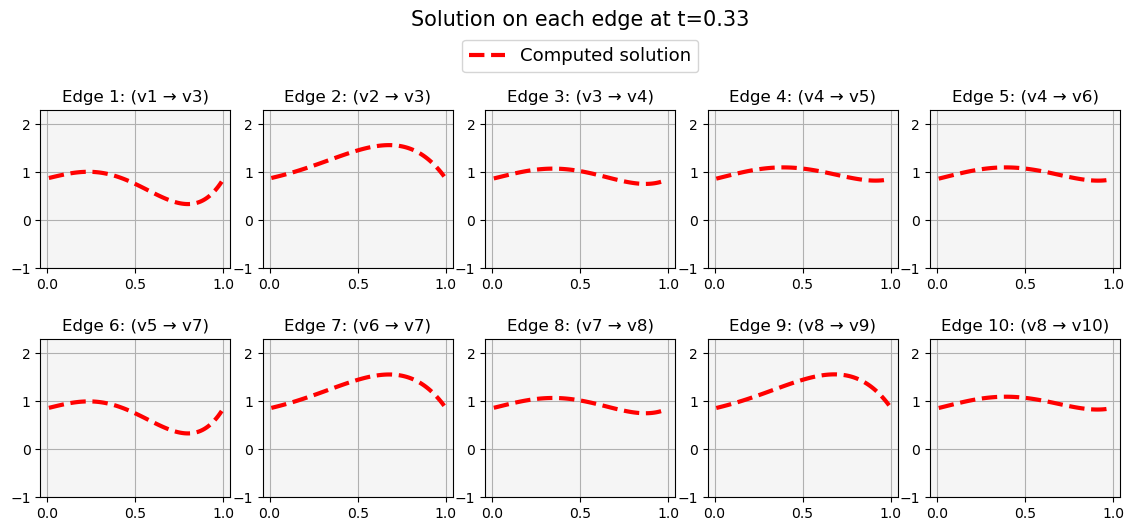

In [4]:
# Plot the 2D edge solutions at a specified time index
t_index = int(nt/3)
plot_edges(Y, nx, nt, T, t_index=t_index, full_edges=full_edges, show=True,
            save=False, example='example_0', exact_sol= None)

If the exact solution is known (as in this example), we can also plot it for comparison.

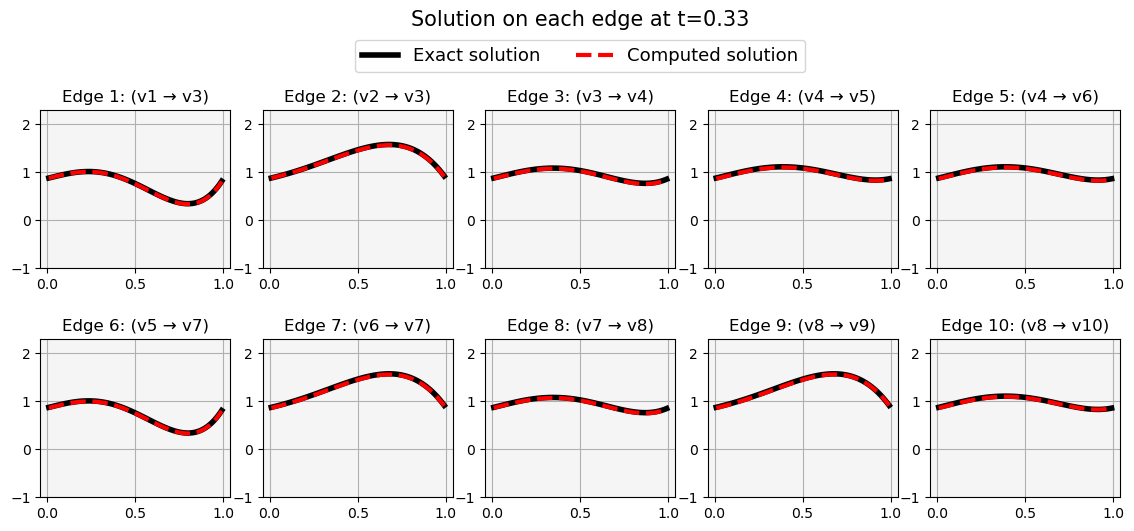

In [5]:
# Plot the 2D edge solutions at a specified time index
from data_ex1 import compute_exact_solution
t_index = int(nt/3)
plot_edges(Y, nx, nt, T, t_index=t_index, full_edges=full_edges, show=True,
            save=False, example='example_0', exact_sol= compute_exact_solution)

### 4.2 3D Graph Plot

The function `plot_graph_3d_with_curves` creates a 3D visualization of the graph with overlaid solution curves. 

**Key Parameters:**
- `computed_sol`: Computed solution array (nt x total_dof).
- `full_edges`: Dictionary mapping edge identifiers to tuples of vertex indices.
- `nx`: Number of interior dofs per edge.
- `nt`: Number of time steps.
- `T`: Final simulation time.
- `k`: Time index at which to visualize the solution.
- `positions`: Dictionary mapping vertex names (e.g., `'v1'`, `'v2'`) to their 2D coordinates. **This is required** for the 3D plot.
- `elevation`: Elevation angle (default 30) for the 3D view.
- `azimuth`: Azimuth angle (default 30) for the 3D view.
- `zorder`: Z-order for plotting curves.
- `save`: Boolean flag to save the figure as an image (default is False).
- `example`: String identifier for saving the plot.

The vertex positions should be provided in a dictionary format. For example:

```python
positions = {
    'v1': [-1.9, 7.95],
    'v2': [-1.9, 2.05],
    'v3': [1.3, 5],
    'v4': [6, 5],
    'v5': [9.5, 7.95],
    'v6': [10, 2.05],
    'v7': [14, 5],
    'v8': [18.7, 5],
    'v9': [21.9, 7.95],
    'v10': [21.9, 2.05]
}
```

The parameters `elevation` and `azimuth` adjust the 3D camera view.

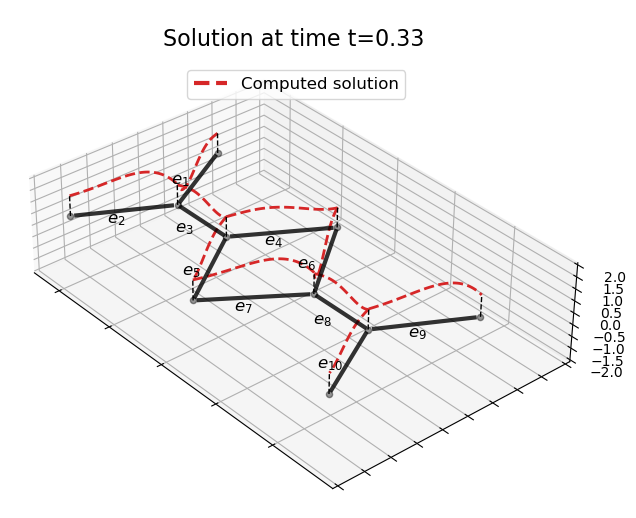

In [6]:
# 3D Plot: Get vertex positions and plot the graph with solution curves
positions = define_positions_example_1()
t_index = int(nt/3)
plot_graph_3d_with_curves(Y, full_edges, nx, nt, T, t_index=t_index, positions=positions, show=True, elevation=33, azimuth=320, save=False, example='example_0_3d', exact_sol=None)

If the exact solution is known (as in this example), we can also plot it for comparison.

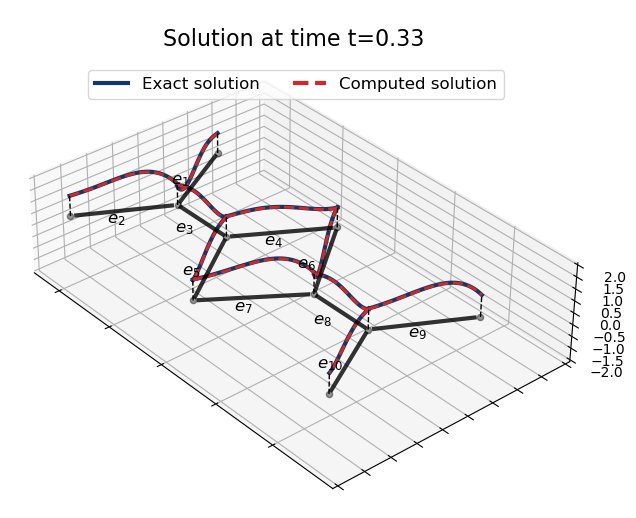

In [7]:
# 3D Plot: Get vertex positions and plot the graph with solution curves
positions = define_positions_example_1()
t_index = int(nt/3)
plot_graph_3d_with_curves(Y, full_edges, nx, nt, T, t_index=t_index, positions=positions, show=True,
                           elevation=33, azimuth=320, save=False, example='example_0_3d', exact_sol=compute_exact_solution)

Feel free to extend and customize the code to meet your needs!